Imports para el proyecto

In [2]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.cluster import SpectralClustering
from sklearn.mixture import GaussianMixture
from sklearn.metrics import silhouette_score, homogeneity_score, completeness_score, v_measure_score, adjusted_rand_score
from google.colab import files
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns

Aca subir el archivo 2020-gastos-covid-19

In [3]:
upload = files.upload()

Saving 2020-Gasto-COVID-19.csv to 2020-Gasto-COVID-19.csv


Aca subir el archivo diccionario de gastos

In [7]:
upload2 = files.upload()

Saving Gasto_COVID_19_Diccionario.csv to Gasto_COVID_19_Diccionario.csv


Lectura de archivos CSV

In [8]:
# Leer los archivos CSV
data = pd.read_csv(next(iter(upload)))
diccionario = pd.read_csv(next(iter(upload2)))


<ipython-input-8-8a161562372e>:2: DtypeWarning: Columns (41) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv(next(iter(upload)))


Inspeccionamiento de datos y diccionario de datos

In [9]:
# Mostrar las primeras filas de los datos
print("Datos principales:")
print(data.head())

print("\nDiccionario de datos:")
print(diccionario.head())

Datos principales:
   ANO_EJE  MES_EJE NIVEL_GOBIERNO NIVEL_GOBIERNO_NOMBRE  SECTOR  \
0     2020        7              E     GOBIERNO NACIONAL      13   
1     2020        8              E     GOBIERNO NACIONAL      13   
2     2020        8              E     GOBIERNO NACIONAL      13   
3     2020        0              E     GOBIERNO NACIONAL      13   
4     2020        0              E     GOBIERNO NACIONAL      13   

  SECTOR_NOMBRE  PLIEGO                      PLIEGO_NOMBRE  SEC_EJEC  \
0   AGRICULTURA     164  AUTORIDAD NACIONAL DEL AGUA - ANA      1299   
1   AGRICULTURA     164  AUTORIDAD NACIONAL DEL AGUA - ANA      1299   
2   AGRICULTURA     164  AUTORIDAD NACIONAL DEL AGUA - ANA      1299   
3   AGRICULTURA     164  AUTORIDAD NACIONAL DEL AGUA - ANA      1299   
4   AGRICULTURA     164  AUTORIDAD NACIONAL DEL AGUA - ANA      1299   

   EJECUTORA  ...              ESPECIFICA_NOMBRE  ESPECIFICA_DET  \
0          1  ...  A OTRAS UNIDADES DEL GOBIERNO               1   
1  

Filtrado de datos

In [10]:
# Filtrar columnas relevantes
data_filtered = data[['MONTO_CERTIFICADO', 'MONTO_DEVENGADO']]

# Convertir a numérico y manejar valores faltantes
data_filtered['MONTO_CERTIFICADO'] = pd.to_numeric(data_filtered['MONTO_CERTIFICADO'], errors='coerce')
data_filtered['MONTO_DEVENGADO'] = pd.to_numeric(data_filtered['MONTO_DEVENGADO'], errors='coerce')

# Eliminar filas con valores faltantes
data_filtered.dropna(inplace=True)

print("Datos filtrados y limpios:")
print(data_filtered.describe())

Datos filtrados y limpios:
       MONTO_CERTIFICADO  MONTO_DEVENGADO
count       2.030750e+05     2.030750e+05
mean        1.102352e+05     1.089204e+05
std         4.104022e+06     3.576669e+06
min        -2.466100e+08    -3.899862e+06
25%         0.000000e+00     0.000000e+00
50%         0.000000e+00     0.000000e+00
75%         1.302100e+03     1.850000e+03
max         9.310798e+08     9.310798e+08


<ipython-input-10-9327e8289024>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_filtered['MONTO_CERTIFICADO'] = pd.to_numeric(data_filtered['MONTO_CERTIFICADO'], errors='coerce')
<ipython-input-10-9327e8289024>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_filtered['MONTO_DEVENGADO'] = pd.to_numeric(data_filtered['MONTO_DEVENGADO'], errors='coerce')
<ipython-input-10-9327e8289024>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in 

PCA y reducir dimensionalidad

<ipython-input-11-18994f4b8eb0>:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_filtered['MONTO_TOTAL'] = data_filtered['MONTO_CERTIFICADO'] + data_filtered['MONTO_DEVENGADO']


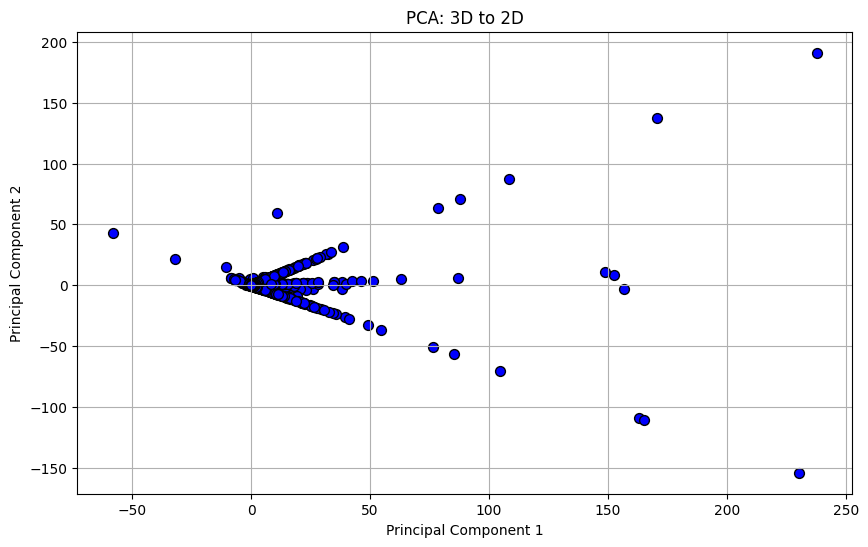

             PC1       PC2
0      -0.053641 -0.005094
1      -0.055126 -0.004100
2      -0.053592 -0.002869
3      -0.055126 -0.004100
4      -0.055126 -0.004100
...          ...       ...
203070 -0.055126 -0.004100
203071 -0.053418 -0.005243
203072 -0.023306 -0.025387
203073  0.055103  0.014430
203074 -0.046250  0.003025

[203075 rows x 2 columns]


In [11]:
def apply_pca_and_plot(data, n_components=2):
    # Asegurarse de que los datos no tengan valores faltantes
    data = data.dropna()

    # Estándarizar los datos
    scaler = StandardScaler()
    data_scaled = scaler.fit_transform(data)

    # Aplicar PCA
    pca = PCA(n_components=n_components)
    data_pca = pca.fit_transform(data_scaled)

    # Crear un DataFrame con los resultados
    df_pca = pd.DataFrame(data_pca, columns=[f'PC{i+1}' for i in range(n_components)])

    # Visualizar los resultados
    plt.figure(figsize=(10, 6))
    plt.scatter(df_pca['PC1'], df_pca['PC2'], c='blue', edgecolor='k', s=50)
    plt.xlabel('Principal Component 1')
    plt.ylabel('Principal Component 2')
    plt.title('PCA: 3D to 2D')
    plt.grid(True)
    plt.show()

    return df_pca

# Aplicar PCA y reducir dimensionalidad
# Aquí se simula una tercera característica para demostración:
data_filtered['MONTO_TOTAL'] = data_filtered['MONTO_CERTIFICADO'] + data_filtered['MONTO_DEVENGADO']

# Reducir de 3 a 2 dimensiones
df_pca = apply_pca_and_plot(data_filtered[['MONTO_CERTIFICADO', 'MONTO_DEVENGADO', 'MONTO_TOTAL']])
print(df_pca)

Aplicar K-Means con datos reducidos

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

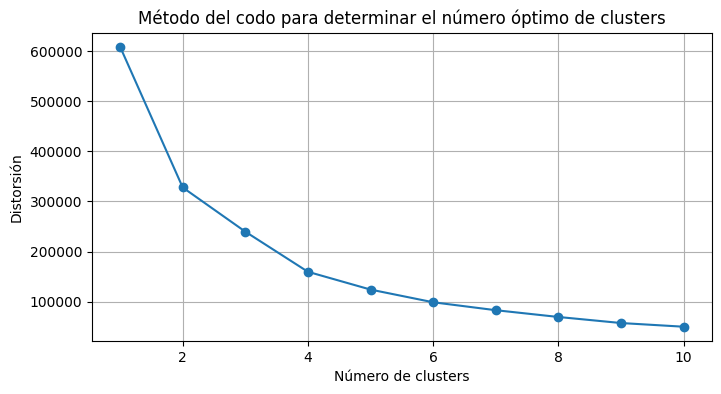

In [12]:
# Aplicar K-Means en los datos reducidos dimensionalmente
def plot_elbow_method(data, max_clusters=10):
    distortions = []
    for i in range(1, max_clusters+1):
        kmeans = KMeans(n_clusters=i, random_state=0)
        kmeans.fit(data)
        distortions.append(kmeans.inertia_)

    plt.figure(figsize=(8, 4))
    plt.plot(range(1, max_clusters+1), distortions, marker='o')
    plt.xlabel('Número de clusters')
    plt.ylabel('Distorsión')
    plt.title('Método del codo para determinar el número óptimo de clusters')
    plt.grid(True)
    plt.show()

# Determinar el número óptimo de clusters usando el método del codo
plot_elbow_method(df_pca)

Elegir numero de clusters

In [13]:
# Elegir el número óptimo de clusters 3
kmeans = KMeans(n_clusters=3, random_state=0)
df_pca['Cluster'] = kmeans.fit_predict(df_pca)

print("Datos con clusters asignados:")
print(df_pca.head())

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Datos con clusters asignados:
        PC1       PC2  Cluster
0 -0.053641 -0.005094        0
1 -0.055126 -0.004100        0
2 -0.053592 -0.002869        0
3 -0.055126 -0.004100        0
4 -0.055126 -0.004100        0


Visualizacion de clustering con kmeans

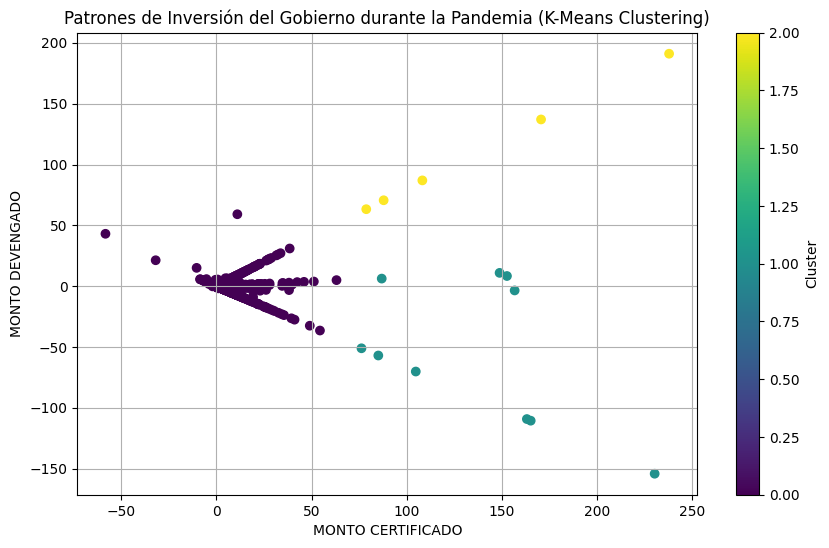

In [14]:
plt.figure(figsize=(10, 6))
plt.scatter(df_pca['PC1'], df_pca['PC2'], c=df_pca['Cluster'], cmap='viridis')
plt.xlabel('MONTO CERTIFICADO')
plt.ylabel('MONTO DEVENGADO')
plt.title('Patrones de Inversión del Gobierno durante la Pandemia (K-Means Clustering)')
plt.colorbar(label='Cluster')
plt.grid(True)
plt.show()

Analisis descriptivo de cluster

In [15]:
# Análisis descriptivo por cluster
cluster_analysis = df_pca.groupby('Cluster').mean()
print("Análisis descriptivo por cluster:")
print(cluster_analysis)

Análisis descriptivo por cluster:
                PC1         PC2
Cluster                        
0         -0.010114   -0.000093
1        137.025082  -53.014416
2        136.714441  109.788014


Evaluacion de modelo

In [ ]:
# Métricas de evaluación sin etiquetas verdaderas
silhouette_avg = silhouette_score(df_pca[['PC1', 'PC2']], df_pca['Cluster'])
print(f"Índice de Silueta: {silhouette_avg:.3f}")

# Simulamos etiquetas verdaderas para calcular métricas que requieren etiquetas verdaderas
true_labels = np.random.randint(0, 3, len(df_pca))

# Calcular métricas que requieren etiquetas verdaderas
homogeneity = homogeneity_score(true_labels, df_pca['Cluster'])
completeness = completeness_score(true_labels, df_pca['Cluster'])
v_measure = v_measure_score(true_labels, df_pca['Cluster'])

print(f"Homogeneidad: {homogeneity:.3f}")
print(f"Completeness: {completeness:.3f}")
print(f"V-Measure: {v_measure:.3f}")

# Calcular inercia
inertia = kmeans.inertia_
print(f"Inercia (Suma de Cuadrados Dentro del Cluster): {inertia:.3f}")

Índice de Silueta: 0.999
Homogeneidad: 0.000
Completeness: 0.005
V-Measure: 0.000
Inercia (Suma de Cuadrados Dentro del Cluster): 239618.981
